In [16]:
!pip install gymnasium

In [17]:
import numpy as np
from Grid import RussellGrid
import matplotlib.pyplot as plt
from utils import print_policy

In [18]:
def init_value_function(env):
    """ Returns a initialized value function array for given MDP."""
    return np.zeros((env.world_row,env.world_col))

In [19]:
# Create and print random policy for valid states
def create_random_policy(env):
    """ Creates a random policy for valid states.
    Arguments: MDP
    Returns: policy
    """
    policy = np.zeros((env.world_row,env.world_col))
    state = np.nditer(env.map, flags=['multi_index'])
    while not state.finished:
        if state[0]==0:
            policy[state.multi_index] = np.random.choice(4, 1)
        state.iternext()

    # Policy should be defined only for states where we should take decisions, so we set the policy
    # for terminal and impossible states to -1 [not important but useful for printing the policy]
    policy[0,3]=-1  # Special value for terminal state
    policy[1,3]=-1  # Special value for terminal state
    policy[1,1]=-1  # Not defined for non-valid states
    return policy

### TASK 1

Inner loop of Policy Evaluation (policy_evaluation_one_step)

In [20]:
def policy_evaluation_one_step(env, V, policy, gamma=0.99):
    """ Computes one step of policy evaluation.
    Arguments: MDP, value function, policy, discount factor
    Returns: Value function of policy
    """
    # Init value function array
    V_new = V.copy()

    # TODO: Write your implementation here
    state = np.nditer(env.map, flags=['multi_index'])
    while not state.finished:
        acum=0
        if env.map[state.multi_index]==0:
            for p,next_state in env.P[state.multi_index][policy[state.multi_index]]:
                acum = acum + p*(env.reward_matrix[next_state]+gamma*V[next_state])
            V_new[state.multi_index] = acum
        state.iternext()

    return V_new

###TASK 2

Policy evaluation

In [21]:
def policy_evaluation(env, policy, discount=0.99, theta=0.01):
    """ Computes full policy evaluation until convergence.
    Arguments: MDP, policy, discount factor, theta
    Returns: Value function of policy
    """
    # Init value function array
    V = init_value_function(env)

    # TODO: Write your implementation here
    while True:
        V_new = policy_evaluation_one_step(env, V, policy, gamma=discount)
        if np.max(abs(V_new - V)) < theta:
            break
        V = V_new.copy()

    return V_new.copy()

###TASK 3

Policy improvement

In [22]:
#This is optional. You can help implement policy_improvement with the help of this function or not

def greedy_action(env, V, state, gamma=0.99):
    """ Computes greedy action w.r.t a given MDP, value function and State.
    Arguments: MDP, value function, state
    Returns: greedy action
    """
    # TODO: Write your implementation here
    acum=np.zeros(env.action_space.n)
    for action in range(0,env.action_space.n):
        for p,next_state in env.P[state.multi_index][action]:
                acum[action] = acum[action] + p*(env.reward_matrix[next_state]+gamma*V[next_state])
    return np.argmax(acum)

In [23]:
def policy_improvement(env, V, discount=0.99):
    """ Computes greedy policy w.r.t a given MDP and value function.
    Arguments: MDP, value function, discount factor
    Returns: policy
    """
    # Initialize a policy array in which to save the greedy policy
    policy_new = np.zeros((env.world_row,env.world_col))
    # Policy should be defined only for states where we should take decisions, so we set the policy
    # for terminal and impossible states to -1 [not important but useful for printing the policy]
    policy_new[0,3]=-1  # Special value for terminal state
    policy_new[1,3]=-1  # Special value for terminal state
    policy_new[1,1]=-1  # Not defined for non-valid states

    # TODO: Write your implementation here
    state = np.nditer(env.map, flags=['multi_index'])
    while not state.finished:
        if env.map[state.multi_index]==0:
            policy_new[state.multi_index] = greedy_action(env, V, state, discount)
        state.iternext()

    return policy_new

###TASK 4

Policy iteration

In [24]:
def policy_iteration(env, discount=0.99, theta=0.01):
    """ Computes the policy iteration (PI) algorithm.
    Arguments: Env, discount factor, theta
    Returns: value function, policy
    """

    # Start from random policy
    policy = create_random_policy(env)
    print('Initial policy:')
    print_policy(policy)
    # And 0 Value function
    V = init_value_function(env)

    # TODO: Write your implementation here
    # Enter the loop
    unchanged = False

    while not unchanged:
        unchanged = True
        # Policy evaluation step
        V=policy_evaluation(env,policy,discount,theta)

        # Policy improvement
        policy_new = policy_improvement(env, V, discount=discount)

        if not (policy_new == policy).all():
            print('Update!')
            print_policy(policy_new, V)
            policy = policy_new.copy()
            unchanged = False


    return V, policy

###TASK 5

Value iteration


In [25]:
def value_iteration(env, discount=0.99, theta=0.01):
    """ Computes the value iteration (VI) algorithm.
    Arguments: env, discount factor, theta
    Returns: value function, policy
    """
    # Init value function array
    V = init_value_function(env)

    # TODO: Write your implementation here
    while True:
        V_new = V.copy()

        # TODO: Write your implementation here
        state = np.nditer(env.map, flags=['multi_index'])
        while not state.finished:
            acum=0
            if env.map[state.multi_index]==0:
                acum=np.zeros(env.action_space.n)
                for action in range(0,env.action_space.n):
                    for p,next_state in env.P[state.multi_index][action]:
                            acum[action] = acum[action] + p*(env.reward_matrix[next_state]+discount*V[next_state])
                V_new[state.multi_index] = np.max(acum)
            state.iternext()

        if np.max(abs(V_new - V)) < theta:
            break
        V = V_new.copy()

    # Get the greedy policy w.r.t the calculated value function
    policy = policy_improvement(env, V)

    return V_new, policy

-----------------
Policy iteration:
-----------------
Initial policy:


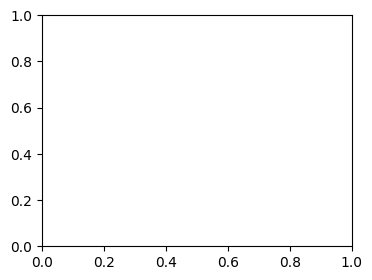

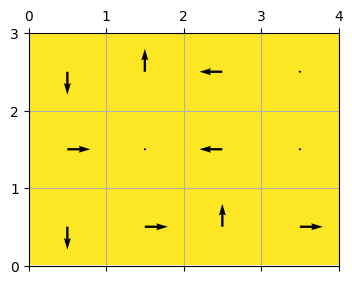

Update!


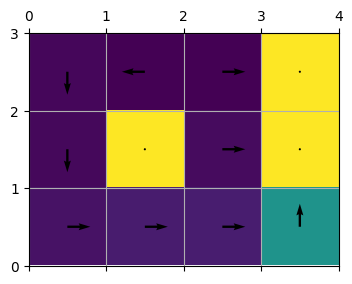

Update!


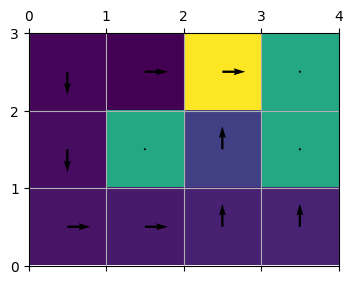

Update!


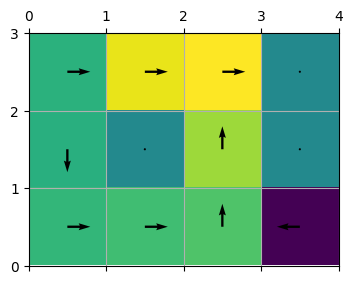

Update!


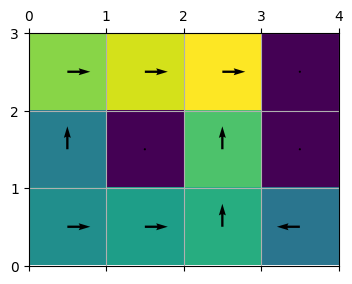

Update!


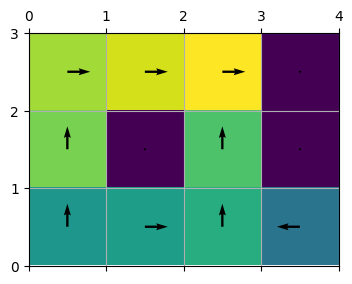

Update!


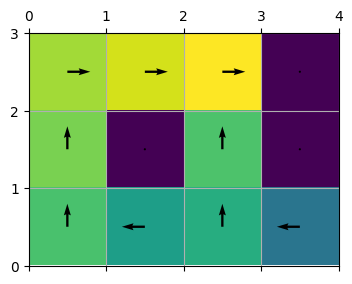

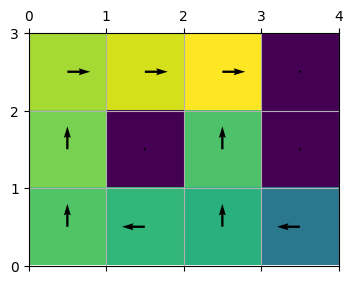

---------------
Value iteration
---------------


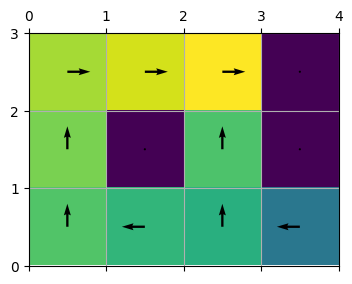

Value function:
[[0.82421144 0.89285567 0.95464048 0.        ]
 [0.7635802  0.         0.68820424 0.        ]
 [0.69391207 0.62966708 0.60366862 0.37771081]]


In [26]:
if __name__ == "__main__":
    # Create the MDP
    env = RussellGrid(mode='movie')
    discount = 0.99
    theta = 0.01

    # Do a full PI and print
    print('-----------------')
    print('Policy iteration:')
    print('-----------------')
    V, policy = policy_iteration(env, discount=discount, theta=theta)
    print_policy(policy, V)

    # Do a full VI and print
    print('---------------')
    print('Value iteration')
    print('---------------')
    V, policy = value_iteration(env, discount=discount, theta=theta)
    print_policy(policy, V)
    print('Value function:')
    print(V)